# Tensorflow 101
i tried to make it as simple as possible for beginners.
The iris flower dataset has been used and a 1 layer neural network is what it is.
PS: No train and test data split  was done to make it simple. This neural network just remembers what it saw.

In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
import urllib.request
import re
%matplotlib notebook

In [2]:
# download the dataset and keep it if u like
# didnt care to check if it existed
filename = 'iris.csv'
# read data
response = urllib.request.urlopen('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data')
data = response.read().decode('utf-8')

# replace text labels with numbers:
# Iris-setosa = 0
# Iris-versicolor = 1
# Iris-virginica =2

data = re.sub('Iris-setosa','0',data)
data = re.sub('Iris-versicolor','1',data)
data = re.sub('Iris-virginica','2',data)

with open(filename,mode='w') as file:
    file.write(data)

In [3]:
ds = np.genfromtxt(filename,delimiter=',')
np.random.shuffle(ds)

In [4]:
y = ds[:,4]
x = ds[:,:4]
# one hot labeled y
y = np.eye(3)[y.astype(np.int32)]

In [5]:
X = tf.placeholder(tf.float32,shape=[None,4])
Y = tf.placeholder(tf.float32,shape=[None,3])

In [6]:
out = tf.layers.dense(X,3)
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=Y,logits=out))
train = tf.train.GradientDescentOptimizer(0.05).minimize(loss)
correct_prediction = tf.equal(tf.argmax(Y, 1), tf.argmax(out, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [7]:
init = tf.global_variables_initializer()
losses=[]
accs =[]
with tf.Session() as sess:
    sess.run(init)
    for i in range(100):
        _,l,a = sess.run([train,loss,accuracy],feed_dict={X:x,Y:y})
        losses.append(l)
        accs.append(a)

<IPython.core.display.Javascript object>


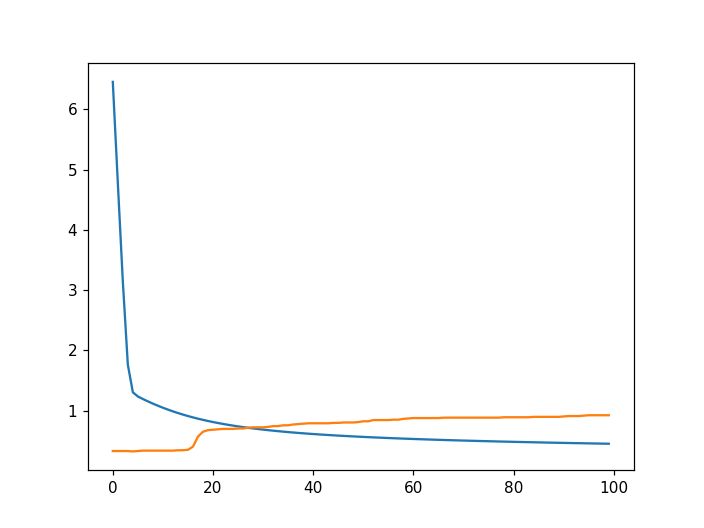

In [8]:
plt.plot(losses)
plt.plot(accs)